In [37]:
from sklearn.cluster import KMeans
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [38]:
img = cv2.imread("./doctor-strange-2-benedict-cumberbatch.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

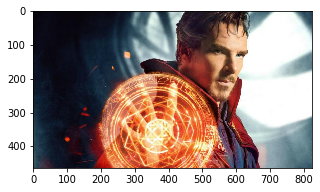

(464, 825, 3)


In [39]:
plt.figure(figsize=(5,5))
plt.imshow(img)
plt.show()
print (img.shape)

In [40]:
c_img = img.copy()
c_img = np.reshape(c_img, (-1,3))

c_img3 = img.copy()
c_img3 = np.reshape(c_img3, (-1,3))

c_img5 = img.copy()
c_img5 = np.reshape(c_img5, (-1,3))

print (c_img.shape)
print (c_img3.shape)
print (c_img5.shape)

(382800, 3)
(382800, 3)
(382800, 3)


In [41]:
kmeans = KMeans(n_clusters=7,random_state=2)
kmeans3=KMeans(n_clusters=3,random_state=2)
kmeans5=KMeans(n_clusters=5,random_state=2)

In [42]:
kmeans.fit_predict(c_img)

array([0, 0, 0, ..., 5, 5, 5], dtype=int32)

In [43]:
kmeans3.fit_predict(c_img3)

array([0, 0, 0, ..., 0, 0, 0], dtype=int32)

In [44]:
kmeans5.fit_predict(c_img5)

array([0, 0, 0, ..., 0, 3, 3], dtype=int32)

In [45]:
centers = kmeans.cluster_centers_.astype(int)
centers3=kmeans3.cluster_centers_.astype(int)
centers5=kmeans5.cluster_centers_.astype(int)

print (centers)
print (centers3)
print (centers5)

[[ 22  22  34]
 [165 186 189]
 [133  48  36]
 [242 189 134]
 [249 251 247]
 [ 85 107 120]
 [218 112  64]]
[[ 35  28  39]
 [235 233 222]
 [185 119  90]]
[[ 27  25  37]
 [240 243 237]
 [176  71  44]
 [114 137 147]
 [235 165 112]]


In [46]:
per = np.array(np.unique(kmeans.labels_, return_counts=True)[1], dtype=np.float32)
per = per/c_img.shape[0]

print(per)

[0.35176594 0.07644723 0.0985815  0.09851358 0.16861285 0.08454545
 0.12153344]


In [47]:
per3 = np.array(np.unique(kmeans3.labels_, return_counts=True)[1], dtype=np.float32)
per3 = per3/c_img3.shape[0]

print(per3)

[0.43601881 0.26764368 0.29633751]


In [48]:
per5 = np.array(np.unique(kmeans5.labels_, return_counts=True)[1], dtype=np.float32)
per5 = per5/c_img5.shape[0]

print(per5)

[0.39039707 0.21183647 0.14609718 0.10876698 0.1429023 ]


In [49]:
dom = [ [per[ix], centers[ix]] for ix in range(kmeans.n_clusters) ]
#print (dom)
DOM = sorted(dom, reverse=True)

print (DOM)

[[0.35176593521421107, array([22, 22, 34])], [0.1686128526645768, array([249, 251, 247])], [0.12153343782654127, array([218, 112,  64])], [0.09858150470219436, array([133,  48,  36])], [0.0985135841170324, array([242, 189, 134])], [0.08454545454545455, array([ 85, 107, 120])], [0.07644723092998955, array([165, 186, 189])]]


In [50]:
dom3 = [ [per3[ix], centers3[ix]] for ix in range(kmeans3.n_clusters) ]
#print (dom)
DOM3 = sorted(dom3, reverse=True)

print (DOM3)

[[0.4360188087774295, array([35, 28, 39])], [0.296337513061651, array([185, 119,  90])], [0.26764367816091955, array([235, 233, 222])]]


In [51]:
dom5 = [ [per5[ix], centers5[ix]] for ix in range(kmeans5.n_clusters) ]
#print (dom)
DOM5 = sorted(dom5, reverse=True)

print (DOM5)

[[0.39039707419017766, array([27, 25, 37])], [0.21183646812957158, array([240, 243, 237])], [0.1460971786833856, array([176,  71,  44])], [0.1429022988505747, array([235, 165, 112])], [0.10876698014629049, array([114, 137, 147])]]


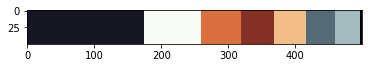

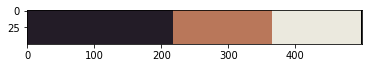

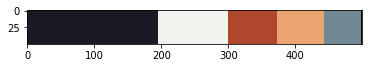

In [52]:
color_p = np.zeros((50,500,3)).astype(int)
color_p3 = np.zeros((50,500,3)).astype(int)
color_p5 = np.zeros((50,500,3)).astype(int)

start = 0
for ix in range(kmeans.n_clusters):
    width = int( (DOM[ix][0])*color_p.shape[1] )
    
    end = start+width
    color_p[:,start:end, :] = DOM[ix][1]
    start = end
    
plt.imshow(color_p)
plt.show()

start = 0
for ix in range(kmeans3.n_clusters):
    width = int( (DOM3[ix][0])*color_p3.shape[1] )
    
    end = start+width
    color_p3[:,start:end, :] = DOM3[ix][1]
    start = end
    
plt.imshow(color_p3)
plt.show()

start = 0
for ix in range(kmeans5.n_clusters):
    width = int( (DOM5[ix][0])*color_p5.shape[1] )
    
    end = start+width
    color_p5[:,start:end, :] = DOM5[ix][1]
    start = end
    
plt.imshow(color_p5)
plt.show()

In [53]:
for ix in range(c_img.shape[0]):
    c_img[ix] = centers[kmeans.labels_[ix]]
    
c_img = np.reshape(c_img, (img.shape[0], img.shape[1], 3))

In [54]:
for ix in range(c_img3.shape[0]):
    c_img3[ix] = centers[kmeans3.labels_[ix]]
    
c_img3 = np.reshape(c_img3, (img.shape[0], img.shape[1], 3))

In [55]:
for ix in range(c_img5.shape[0]):
    c_img5[ix] = centers[kmeans5.labels_[ix]]
    
c_img5 = np.reshape(c_img5, (img.shape[0], img.shape[1], 3))

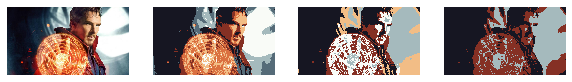

In [60]:
plt.figure(figsize=(10,10))
plt.subplot(1,4,1)
plt.axis("off")
plt.imshow(img)

plt.subplot(1,4,2)
plt.axis("off")
plt.imshow(c_img)

plt.subplot(1,4,3)
plt.axis("off")
plt.imshow(c_img5)

plt.subplot(1,4,4)
plt.axis("off")
plt.imshow(c_img3)

plt.show()